In [22]:
%load_ext autoreload
%autoreload 2
from feature_extractor import FeatureExtractor
from classifier import Classifier
from signal_manager import SignalMgr
from filter import Filter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

feaExtractor = FeatureExtractor()
classifier = Classifier
sigMgr = SignalMgr()

# norm_signal = sigMgr.normalize_signals(signals)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import os, sys
## start evaluation of data
# TEST_LABEL = '/Users/changkong/ML/Signal Classification/testData/20180204/labels.csv'
RESULT_FPATH = '/Users/changkong/ML/Signal Classification/3_Application/label.csv'
# get all data from 
TEST_DATA_ROOT = "/Users/changkong/ML/Signal Classification/3_Application/Data/"

In [3]:
def get_signal_list(root_path, file_name = 'Channel_1.csv'):
    test_suites = os.listdir(root_path)
    test_cases_path = []
    expect_result = []
    for test in test_suites:
        dir_path = os.path.join(root_path, test)
        if not os.path.isdir(dir_path):
            continue
        case_path = os.path.join(dir_path, file_name)
        if not os.path.isfile(case_path):
            continue
        test_cases_path.append(case_path)
        with open(case_path, 'r') as fhandler:
            ret = fhandler.readline().strip()
            if int(ret) > 0:
                ret = 1
            else:
                ret = 0
            expect_result.append(ret)
    return (test_cases_path, expect_result) 

In [4]:
pathes, ret = get_signal_list(TEST_DATA_ROOT)

In [5]:
label_df = pd.read_csv(RESULT_FPATH, header=None, skiprows=1, names=['case_name', 'expect_result'], dtype={'expect_result':np.int32}).dropna()

In [6]:
test_cases_df = pd.DataFrame(pathes, columns= ['case_path'])
test_cases_df['case_name'] = test_cases_df['case_path'].apply(lambda x: x.split('/')[-2])
test_cases_df['expect_result'] = ret
test_labels = test_cases_df.merge(label_df, on='case_name')

In [7]:
test_labels.head(100)

,case_path,case_name,expect_result_x,expect_result_y
0,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_090536,1,0
1,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_090637,0,3
2,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091016,0,1
3,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091047,0,0
4,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091103,0,1
5,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091138,0,0
6,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091155,0,1
7,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091224,0,0
8,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091237,0,1
9,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091316,0,1


In [8]:
test_labels['expect_result_y'].value_counts()

0    3546
1    2027
2    1825
3     147
Name: expect_result_y, dtype: int64

In [10]:
predict_result = list()
pathes = test_labels['case_path']
for test_case in pathes:
    predict_ret = sigMgr.process(test_case, request_param={'skip_row':[1]})
    predict_result.append(predict_ret['stat'])

ValueError: cannot reshape array of size 2 into shape (3,)

In [11]:
%reload_ext autoreload
sigMgr.process('/Users/changkong/ML/Signal Classification/3_Application/Data/20180325_090637/Channel_1.csv', request_param={'skip_row':[1]})

{'reason': 5, 'speed': 6958.007812499999, 'stat': 1}

In [12]:
test_labels['predict_result'] = predict_result

ValueError: Length of values does not match length of index

In [ ]:
test_labels[test_labels.predict_result == 0].count()

In [ ]:
test_labels.head()

In [ ]:
invalid_result = test_labels[(test_labels.expect_result_y > 1) & (test_labels.predict_result == 0)].reset_index(drop=True)

In [ ]:
valid_result = test_labels[(test_labels.expect_result_y == 0) & (test_labels.predict_result == 0)].reset_index(drop=True)
print valid_result.count()

In [ ]:
valid_result = test_labels[(test_labels.expect_result_y == 1) & (test_labels.predict_result == 0)].reset_index(drop=True)
print valid_result.count()

In [ ]:
# invalid_result.head()
# invalid_result['case_name']
invalid_result.count()

In [13]:
ret = sigMgr.process('/Users/changkong/ML/Signal Classification/3_Application/Data/20180325_100453/Channel_1.csv', request_param={'skip_row':[1], 'debug':False})
# print ret
# debug_info = ret['debug']


In [14]:

ret = sigMgr.process('/Users/changkong/Desktop/20180404_134025/Channel_1.csv', request_param={'skip_row':[1], 'debug':True})
# print ret
# debug_info = ret['debug']


In [15]:
# np.std(debug_info['height_delta'])
print ret

{'stat': 0, 'speed': 13183.593749999998, 'reason': -1}


In [16]:
plt.plot(debug_info['normalized_signal'][0:1000])
print debug_info['down_peaks']
print "peaks:%d ups:%d downs:%d down_peaks:%d" % (len(debug_info['peaks']), len(debug_info['up_edges']), len(debug_info['down_edges']), len(debug_info['down_peaks']))

NameError: name 'debug_info' is not defined

In [ ]:
invalid_result.head()
invalid_result.count()

{'stat': 0, 'speed': 13183.593749999998, 'reason': -1}


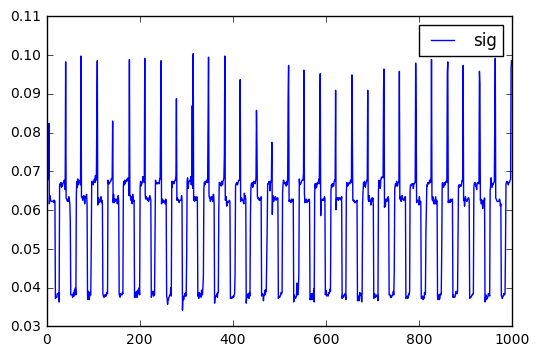

In [21]:
df_signals = pd.read_csv('/Users/changkong/ML/Signal Classification/testData/20180410现场测试/Data-0410-2/20180410_133005/Channel_1.csv', skiprows=1, header=None, names=['sig'])
df_signals[0:1000].plot()
# print invalid_result['case_path'][3]
ret = sigMgr.process('/Users/changkong/Desktop/20180404_134025/Channel_1.csv', request_param={'skip_row':[1], 'debug':True})
print ret

In [ ]:
from filter import Filter
df_signals.head()
# plt.plot(debug_info['normalized_signal'])
# medFilterResult = Filter.medfilter(df_signals['sig'], 21)
medFilterResult = Filter.medfilter(debug_info['normalized_signal'], 9)
peak_candidates = (debug_info['normalized_signal'] - medFilterResult)
plt.plot(medFilterResult)
plt.plot(peak_candidates)
print len(medFilterResult)

In [ ]:
plt.plot(medFilterResult[229:235])

In [ ]:
nms_result = Filter.nms(peak_candidates, 21, True)
plt.plot(nms_result)
plt.plot(peak_candidates)

In [ ]:
idx = np.arange(0, len(df_signals['sig']))
masks = nms_result < -1.0
peak_idx = idx[masks]
num_of_peaks = masks.sum()

In [ ]:
# print num_of_peaks
print masks

In [ ]:
print peak_idx
print df_signals['sig'][0]

In [ ]:
classifier.signalDiagnosis(df_signals['sig'])

In [ ]:
38.0 / 4.0 / (1024 * 0.00002) * 60